In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np  
import random 

109.96012071866242


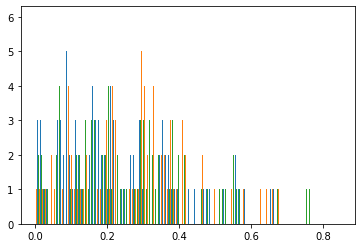

In [2]:
vgreen=np.random.normal((0.9*120),(0.05*120),250)
filter_arr = vgreen<=120
vgreen=vgreen[filter_arr][:200]

vyellow=np.random.normal((0.7*80),(0.1*80),250)
filter_arr = vyellow<=80
vyellow=vyellow[filter_arr][:200]

vred=np.random.normal((0.5*60),(0.15*60),250)
filter_arr = vred<=60
vred=vred[filter_arr][:200]

a=random.uniform(0.03, 0.07)
landa=np.random.normal(a,(0.15*a),size=(300,3))

twait= np.random.normal(-25*(landa-0.07),0.05,size=(300,3))

filter_arr =  twait>=0
twait=twait[filter_arr]
filter_arr =  twait<=1
twait=twait[filter_arr][:600]
twait=twait.reshape(200,3)

landa=landa[:200][:,1]

# print("landa is: ", landa)
# print("twait is: ", twait)

einit=np.random.uniform(0.04, 0.06, 200)

import matplotlib.pyplot as plt
plt.hist(twait,200)
# plt.show()
print(vgreen[0])

In [72]:
model = AbstractModel()

road=np.zeros((40,40))

road[2,1]=1
road[1,2]=1
road[1,3]=1
road[3,1]=1
road[3,8]=1
road[8,3]=1
road[8,11]=1
road[11,8]=1
road[11,12]=1
road[12,11]=1
road[12,18]=1
road[18,12]=1
road[18,30]=1
road[30,18]=1
road[30,31]=1
road[31,30]=1
road[36,31]=1
road[31,36]=1
road[39,36]=1
road[36,39]=1
road[38,39]=1
road[39,38]=1
road[38,37]=1
road[37,38]=1
road[37,24]=1
road[24,37]=1
road[24,13]=1
road[13,24]=1
road[2,13]=1
road[13,2]=1
# vyellow=2
road[1,4]=2
road[4,1]=2
road[2,4]=2
road[4,2]=2
road[14,4]=2
road[4,14]=2
road[14,15]=2
road[15,14]=2
road[14,13]=2
road[13,14]=2
road[13,19]=2
road[19,13]=2
road[19,20]=2
road[20,19]=2
road[19,25]=2
road[25,19]=2
road[25,24]=2
road[24,25]=2
road[25,26]=2
road[26,25]=2
road[32,37]=2
road[37,32]=2
road[32,33]=2
road[33,32]=2
road[33,38]=2
road[38,33]=2
road[33,34]=2
road[34,33]=2
road[34,35]=2
road[35,34]=2
road[34,39]=2
road[39,34]=2
road[35,36]=2
road[36,35]=2
road[28,31]=2
road[31,28]=2
road[23,30]=2
road[30,23]=2
road[23,22]=2
road[22,23]=2
road[23,18]=2
road[18,23]=2
road[18,17]=2
road[17,18]=2
road[12,10]=2
road[10,12]=2
road[11,10]=2
road[10,11]=2
road[8,10]=2
road[10,8]=2
road[8,9]=2
road[9,8]=2
road[3,7]=2
road[7,3]=2
# vred=3
road[4,5]=3
road[5,4]=3
road[5,6]=3
road[6,5]=3
road[6,15]=3
road[15,6]=3
road[15,20]=3
road[20,15]=3
road[20,26]=3
road[26,20]=3
road[26,32]=3
road[32,26]=3
road[26,27]=3
road[27,26]=3
road[27,33]=3
road[33,27]=3
road[27,34]=3
road[34,27]=3
road[27,28]=3
road[28,27]=3
road[28,35]=3
road[35,28]=3
road[28,29]=3
road[29,28]=3
road[29,22]=3
road[22,29]=3
road[22,17]=3
road[17,22]=3
road[17,10]=3
road[10,17]=3
road[10,9]=3
road[9,10]=3
road[9,7]=3
road[7,9]=3
road[7,6]=3
road[6,7]=3
road[16,9]=3
road[9,16]=3
road[16,15]=3
road[15,16]=3
road[16,17]=3
road[17,16]=3
road[21,20]=3
road[20,21]=3
road[21,16]=3
road[16,21]=3
road[21,22]=3
road[22,21]=3
road[21,27]=3
road[27,21]=3

model.N_m=Param(mutable=True)
model.i = RangeSet(1,model.N_m)
model.j = Set(initialize=model.i)
model.N = RangeSet(1,model.N_m)
model.k = [5,22,32]
model.pie=Param(mutable=True)
model.dij=Param(mutable=True)
model.alpha=Param(mutable=True)
model.landa_e=Param(mutable=True)
model.Emax=Param(mutable=True)
model.t_wait=Param(mutable=True)
model.e_max=Param(mutable=True)
model.Troad = Var(bounds=(0,100),initialize=0.1, within=NonNegativeReals)
model.Twait = Var(bounds=(0,100),initialize=0.1, within=NonNegativeReals)
model.Croad = Var(bounds=(0,200),initialize=0.1, within=NonNegativeReals)
model.Cch = Var(bounds=(0,100),initialize=0.1, within=NonNegativeReals)
model.e_end = Var(bounds=(0,1),initialize=0.1, within=NonNegativeReals)
model.x = Var(model.i,model.j,initialize=1,within=Binary)
model.y = Var(model.k,initialize=1,within=Binary)

model.N_m=39
model.e_ini=0.05647944
model.alpha=0.04515895
model.e_max=1
model.pie=0.75
model.d=3
model.e_min=0
model.landa_e=0.03583442
model.Emax=20

model.t_wait = Param(mutable=True)
t_wait=[0.81190255,0.75490729,0.63853011]
model.landa_ch = Param(mutable=True)
landa_ch=[0.03882452,0.03758454,0.0310942]

model.OF = Objective(expr=model.Croad+model.Cch+model.pie*(model.Troad+model.Twait),sense=minimize)

def con_rule_2(model,i,j):    
    return model.Croad>=model.alpha*model.landa_e*sum(model.d*model.x[i,j] for i in model.i for j in model.j)
model.con2 = Constraint(model.i,model.j,rule=con_rule_2)
                       
def con_rule_3(model,i):
    return model.Cch>=(model.e_max-model.e_end)*model.Emax*sum(landa_ch[i]*model.y[model.k[i]] for i in range(len(model.k)))
model.con3 = Constraint(model.i,rule=con_rule_3)
ccc=2
def con_rule_4(model,i,j):   
    if road[i,j]==1:
        return model.Troad>=sum((model.d/(vgreen[0]+0.001))*model.x[i,j] for i in model.i for j in model.j)
    elif road[i,j]==2:
        return model.Troad>=sum((model.d/(vyellow[0]+0.001))*model.x[i,j] for i in model.i for j in model.j)
    elif road[i,j]==3:
        return model.Troad>=sum((model.d/(vred[0]+0.001))*model.x[i,j] for i in model.i for j in model.j)
    else:
        return Constraint.Feasible
model.con4 = Constraint(model.i,model.j,rule=con_rule_4) 
      
def con_rule_5(model,k):
    return model.Twait==sum(t_wait[k]*model.y[model.k[k]] for k in range(len(model.k)))
model.con5 = Constraint(model.k,rule=con_rule_5)  

def con_rule_6(model,i,j):
    return model.e_end==model.e_ini-model.alpha*sum(model.d*model.x[i,j]/model.Emax for i in model.i for j in model.j)
model.con6 = Constraint(model.i,model.j,rule=con_rule_6)  

def con_rule_7(model):
    return model.e_end>=model.e_min
model.con7 = Constraint(rule=con_rule_7)  

def con_rule_8(model,i,j):
    if model.i in [3,15,19]:
        return sum(model.x[i,j] for i in model.i for j in model.j)-sum(model.x[j,i] for i in model.i for j in model.j)==1
    elif model.i not in [3,15,19,5,22,32]:
        return sum(model.x[i,j] for i in model.i for j in model.j)-sum(model.x[j,i] for i in model.i for j in model.j)==0
    elif model.i in [5,22,32]:
        return sum(model.x[i,j] for i in model.i for j in model.j)-sum(model.x[j,i] for i in model.i for j in model.j)==-1
model.con8 = Constraint(model.i,model.j,rule=con_rule_8) 

def con_rule_9(model,k):
    return sum(model.y[model.k[k]] for k in range(len(model.k)))==1
model.con9 = Constraint(model.k,rule=con_rule_9) 
 

    'pyomo.core.base.param.SimpleParam'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.param.SimpleParam'>). This is
    usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


In [73]:
opt = SolverFactory('ipopt')
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance

    model.name="unknown";
      - termination condition: other
      - message from solver: Too few degrees of freedom (rethrown)!


In [74]:
print('Croad=',(value(instance.Croad)))

Croad= 0.1


In [75]:
print('OF=',round(value(instance.OF),2))
print(results)
print('x=',value(instance.x[1,1]))
print('Troad=',value(instance.Troad))
print('Croad=',value(instance.Croad))
print('Twait=',value(instance.Twait))

OF= 0.35

Solver: 
- Status: warning
  Message: Too few degrees of freedom (rethrown)!
  Termination condition: other

x= 1
Troad= 0.1
Croad= 0.1
Twait= 0.1
